In [35]:
import requests
from bs4 import BeautifulSoup
from typing import TypedDict
from langchain.agents import tool
from langchain_groq import ChatGroq
from langchain.schema import SystemMessage, HumanMessage
from langgraph.graph import StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition

# -------------------------
# STEP 1: Define State
# -------------------------
class CityDetails(TypedDict):
    input: str
    city1: str
    city2: str
    cOfLoving1: str
    cOfLoving2: str
    qOfLoving1: str
    qOfLoving2: str
    result: str

# -------------------------
# STEP 2: Define Tools
# -------------------------
@tool
def get_cost_of_living_info(location: str) -> str:
    """Fetches cost of living information for a given location."""
    try:
        url = f"https://www.numbeo.com/cost-of-living/in/{location.replace(' ', '-')}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        div = soup.find(
            'div', 
            {'class': 'seeding-call table_color summary limit_size_ad_right padding_lower other_highlight_color'}
        )
        return div.text.strip() if div else "Cost of living data not found."
    except Exception as e:
        return f"Error fetching data for {location}: {str(e)}"


@tool
def get_quality_of_living_info(location: str) -> str:
    """Fetches quality of living information for a given location."""
    location = location.replace(" ", "-")
    quality_of_living = {
        "New-York": "High competition, high salary, best for finance & tech.",
        "San-Francisco": "Tech hub, many startups, expensive but high salaries.",
        "Austin": "Growing tech scene, affordable living.",
        "Berlin": "Strong finance, healthcare, and consulting job market."
    }
    return quality_of_living.get(location, "Quality of living data not available.")


@tool
def get_property_info(location: str) -> str:
    """Fetches property investment information for a given location."""
    try:
        url = f"https://www.numbeo.com/property-investment/in/{location.replace(' ', '-')}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find('table', class_="table_indices")
        rows = table.find_all('tr')
        data = f"Property Investment Data for {location}"
        for i in range(1, len(rows)):
            tds = rows[i].find_all('td')
            td_data = tds[0].text + tds[1].text.replace("\n", "")
            data += "; " + td_data
        return data
    except:
        return f"Property investment data not found for {location}."

# -------------------------
# STEP 3: Setup Tools & LLM
# -------------------------
tools = [get_cost_of_living_info, get_quality_of_living_info, get_property_info]
tool_node = ToolNode(tools)
llm = ChatGroq(model="llama3-8b-8192", verbose=True)
llm_with_tools = llm.bind_tools(tools)

# -------------------------
# STEP 4: Decision Assistant
# -------------------------
def decisionAssistant(state: CityDetails) -> CityDetails:
    messages = [
        SystemMessage(content="""
        You are an intelligent career decision specialist and have been provided with tools to compare:
        Cost of Living, Quality of Living, and Property Investment Data for two locations.
        
        Based on the tool results, analyze and give a **final comparison**:
            - Cost of living comparison
            - Quality of living comparison
            - Property investment comparison
            - Final conclusion: Which city should I choose and why?
        """),
        HumanMessage(content=state['input'])
    ]
    state['result'] = llm_with_tools.invoke(messages).content
    return state

# -------------------------
# STEP 5: Build Graph
# -------------------------
graph = StateGraph(CityDetails)

graph.add_node('decisionAssistant', decisionAssistant)
graph.add_node('tools', tool_node)

graph.add_edge(START, 'decisionAssistant')
graph.add_conditional_edges('decisionAssistant', tools_condition)
graph.add_edge('tools', 'decisionAssistant')

agent = graph.compile()

# -------------------------
# STEP 6: Run Agent
# -------------------------
result = agent.invoke({
    "input": "I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?",
    "city1": "Austin",
    "city2": "Berlin",
    "cOfLoving1": "",
    "cOfLoving2": "",
    "qOfLoving1": "",
    "qOfLoving2": "",
    "result": ""
})

print(result["result"])


ValueError: No messages found in input state to tool_edge: {'input': 'I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?', 'city1': 'Austin', 'city2': 'Berlin', 'cOfLoving1': '', 'cOfLoving2': '', 'qOfLoving1': '', 'qOfLoving2': '', 'result': ''}

In [36]:
from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage, AIMessage
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.tools import tool
import requests
from bs4 import BeautifulSoup

load_dotenv()

True

In [37]:
llm = ChatGroq(model="llama3-8b-8192", verbose=True)

In [38]:
class CityDetails(TypedDict):
    input: str
    city1: str
    city2: str
    cOfLoving1: str
    cOfLoving2: str
    qOfLoving1: str
    qOfLoving2: str
    result: str

In [39]:
@tool
def get_cost_of_living_info(location: str) -> str:
    """Fetches cost of living information for a given location."""
    try:
        url = f"https://www.numbeo.com/cost-of-living/in/{location.replace(' ', '-')}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        div = soup.find(
            'div', 
            {'class': 'seeding-call table_color summary limit_size_ad_right padding_lower other_highlight_color'}
        )
        return div.text.strip() if div else "Cost of living data not found."
    
    except Exception as e:
        return f"Error fetching data for {location}: {str(e)}"

@tool
def get_quality_of_living_info(location: str) -> str:
    """Fetches dummy quality of living information for a given location."""
    location = location.replace(" ","-")
    quality_of_living = {
        "New-York": "High competition, high salary, best for finance & tech.",
        "San-Francisco": "Tech hub, many startups, expensive but high salaries.",
        "Austin": "Growing tech scene, affordable living.",
        "Berlin": "Strong finance, healthcare, and consulting job market."
    }

    return f"Quality of living in {location}: {quality_of_living[location]}"

@tool
def get_property_info(location: str) -> str:
    """Fetches property related information for a given location."""
    location = location.replace(" ","-")
    url = f"https://www.numbeo.com/property-investment/in/{location.replace(' ', '-')}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    table = soup.find('table',class_="table_indices")
    rows = table.find_all('tr')
    data = f"Property Investment Data for {location}"
    for i in range(len(rows)):
        if i==0:
            continue
        tds = rows[i].find_all('td')
        td_data = tds[0].text+tds[1].text.replace("\n","")
        data = data+"; "+td_data

    return data

tools = [get_cost_of_living_info, get_quality_of_living_info, get_property_info]

In [40]:
tool_node = ToolNode(tools)

In [41]:
llm_with_tools = llm.bind_tools(tools)

In [42]:
def decisionAssistant(state: CityDetails) -> CityDetails:
    messages = [SystemMessage(content="""
    You are an intelligent career decision specialist and have been provided with tools to compare -
        Cost of Living, Quality of Living and Property Investment Data 
    for provided locations and based on that give user which location they should choose and why.
    Your output should contain Final Comparison of -
        {Cost of living}, {Quality of living}, {Property Investment} for both cities
        Conclusion : Which city should I choose and why?
    """),
    HumanMessage(content=state['input'])]
    state['result'] = llm_with_tools.invoke(messages).content

    return state

In [46]:
from langchain.agents import create_react_agent, AgentExecutor
from langchain import hub
prompt = hub.pull("hwchase17/react")  # pulls the standard ReAct agent prompt

agent = create_react_agent(
    llm=llm_with_tools,
    tools=tools,
    prompt=prompt
)

agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True
)

agent_executor.invoke({"input": [SystemMessage(content="""
    You are an intelligent career decision specialist and have been provided with tools to compare -
        Cost of Living, Quality of Living and Property Investment Data 
    for provided locations and based on that give user which location they should choose and why.
    Your output should contain Final Comparison of -
        {Cost of living}, {Quality of living}, {Property Investment} for both cities
        Conclusion : Which city should I choose and why?
    """),
    HumanMessage(content="I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?")]})




> Entering new AgentExecutor chain...
Invalid Format: Missing 'Action:' after 'Thought:'Invalid Format: Missing 'Action:' after 'Thought:'Invalid Format: Missing 'Action:' after 'Thought:'I apologize for the initial confusion. Here's the revised answer:

Question: I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?

Thought: The user is considering a job offer in Berlin, and I need to help them make an informed decision.

Action: get_cost_of_living_info

Action Input: Berlin
Cost of living data not found.Here's the revised answer:

Question: I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?

Thought: The user is considering a job offer in Berlin, and I need to help them make an informed decision.

Action: get_cost_of_living_info

Action Input: Berlin
Cost of living data not found.Invalid Format: Missing 'Action:' after 'Thou

{'input': [SystemMessage(content='\n    You are an intelligent career decision specialist and have been provided with tools to compare -\n        Cost of Living, Quality of Living and Property Investment Data \n    for provided locations and based on that give user which location they should choose and why.\n    Your output should contain Final Comparison of -\n        {Cost of living}, {Quality of living}, {Property Investment} for both cities\n        Conclusion : Which city should I choose and why?\n    ', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?', additional_kwargs={}, response_metadata={})],
 'output': 'Agent stopped due to iteration limit or time limit.'}

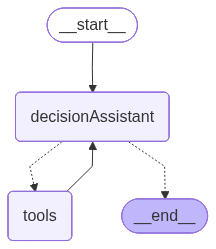

In [43]:
graph = StateGraph(CityDetails)

graph.add_node('decisionAssistant',decisionAssistant)
graph.add_node('tools',tool_node)

graph.add_edge(START, "decisionAssistant")

graph.add_conditional_edges("decisionAssistant",tools_condition)
graph.add_edge('tools', 'decisionAssistant')

agent = graph.compile()
agent

In [ ]:
agent.invoke({"input":"I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?"})

ValueError: No messages found in input state to tool_edge: {'input': 'I am currently a Data Scientist in Austin, and I have a new offer for a Senior Data Scientist position in Berlin. Should I take it?', 'result': ''}